# PM2 Sample image classification using deep learning model


## Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True )
data_dir_path='/content/drive/My Drive/Project/'

Mounted at /content/drive


In [2]:
!ls -l /content/drive/My\ Drive/Project

total 52382
-rw------- 1 root root  1445001 Aug 21 12:09 booksummariesWithGenresAbridged.xlsx
-rw------- 1 root root 32102953 Aug 23 13:26 check.csv
drwx------ 2 root root     4096 Aug 27 03:44 data
-rw------- 1 root root   183442 Aug  1 00:06 data_file.txt
drwx------ 2 root root     4096 Aug 19 11:51 Desktop
drwx------ 2 root root     4096 Aug 25 07:46 image
-rw------- 1 root root 16138584 Aug 12 02:44 new_sample.csv
-rw------- 1 root root  2938999 Aug  3 11:02 sample.csv
-rw------- 1 root root    72650 Jul 31 23:56 Scrapped_data.csv
-rw------- 1 root root    72650 Aug  1 06:23 Scrapped_dataV01.csv
-rw------- 1 root root    80649 Aug  1 07:40 Scrapped_dataV01.json
-rw------- 1 root root      472 Jul 31 23:46 ScrappedTitles.csv
-rw------- 1 root root   115620 Aug  1 07:41 sentiments.txt
-rw------- 1 root root   473590 Aug 22 10:21 test_sample.csv


## Import Keras and Plot Libraries

In [3]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
from   tqdm                  import tqdm

import keras
from keras.models            import load_model
from keras.models            import Sequential
from keras.layers            import Dense, Dropout, Flatten
from keras.layers            import Conv2D, MaxPooling2D
from keras.utils             import to_categorical
from keras.preprocessing     import image
from sklearn.model_selection import train_test_split

%matplotlib inline

## Define Data and Image Folder

In [4]:
PM_data  = '/content/drive/My Drive/Project/data/'
PM_image = '/content/drive/My Drive/Project/image/'

## Import Label file


In [5]:
dataset_label = pd.read_csv(PM_data + '/label.csv')    # reading the csv file
dataset_label.head()      # printing first five rows of the file

,Id,Label,apple,longbean,onion,pineapple,potato
0,apple_001.jpg,['apple'],1,0,0,0,0
1,apple_002.jpg,['apple'],1,0,0,0,0
2,apple_003.jpg,['apple'],1,0,0,0,0
3,apple_004.jpg,['apple'],1,0,0,0,0
4,apple_005.jpg,['apple'],1,0,0,0,0


## Printing Header

In [6]:
dataset_label.columns

Index(['Id', 'Label', 'apple', 'longbean', 'onion', 'pineapple', 'potato'], dtype='object')

## Load Images into X

In [7]:
dataset_image = []
for i in tqdm(range(dataset_label.shape[0])):
    img = image.load_img(PM_image + dataset_label['Id'][i], target_size=(400, 400, 3))
    img = image.img_to_array(img)
    img = img / 255
    dataset_image.append(img)

X = np.array(dataset_image)

100%|██████████| 301/301 [00:02<00:00, 142.19it/s]


## Check X shape to make sure that all the images are loaded

In [8]:
X.shape

(301, 400, 400, 3)

## Display Random Images and Corresponding Labels

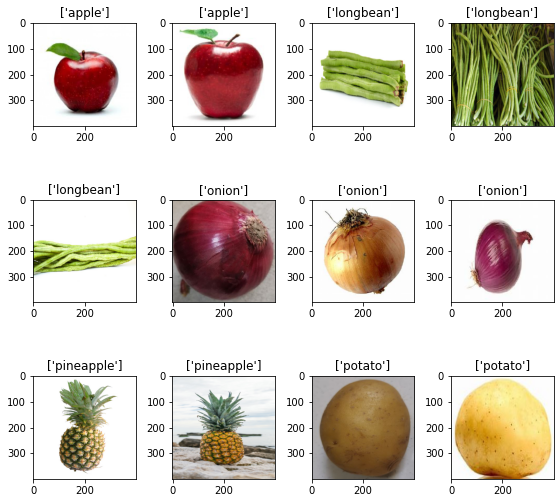

In [9]:
index = [5, 25, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]

fig=plt.figure(figsize=(8, 8))
w=10
h=10

col = 4
row = 3

for i in range(1, col * row + 1):
    fig.add_subplot(row, col, i)
    plt.tight_layout()
    plt.imshow(dataset_image[index[i-1]])
    plt.title(dataset_label['Label'][index[i-1]])

plt.show()

## y label (Number of Images and Classes)

In [10]:
y = np.array(dataset_label.drop(['Id', 'Label'], axis=1))
y.shape

(301, 5)

## Splitting X images and y labels into train and test dataset with a ratio of 80/20

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

## X_train, X_test, y_train, y_test shape to confirm training and test split size

In [12]:
print("\n X_train.shape : ")
print(X_train.shape)
print("\n X_test.shape : ")
print(X_test.shape)
print("\n y_train.shape : ")
print(y_train.shape)
print("\n y_test.shape : ")
print(y_test.shape)


 X_train.shape : 
(240, 400, 400, 3)

 X_test.shape : 
(61, 400, 400, 3)

 y_train.shape : 
(240, 5)

 y_test.shape : 
(61, 5)


## Number of classes and input shape


In [13]:
num_classes = y.shape[1]
print("\nNumber of Classes:")
print(num_classes)

input_shape = (400, 400, 3)
print("\ninput_shape:")
input_shape


Number of Classes:
5

input_shape:


(400, 400, 3)

## Create a Deep Learning Model




In [14]:
## define model as Sequential
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400, 400, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))


## Print Model Summary
* Check model layers
* Check number of cells used

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 198, 198, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 93, 93, 64)        5

## Display Model Layers

In [16]:
model_len = len(model.layers)
print("Number of Layers:")
print(model_len)

Number of Layers:
15


## Compile the Model

In [17]:
# Compile a model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Set Training Parameters

In [18]:
batch_size = 32
epochs = 100

## Train 100 Epoch and Save the Model

In [19]:
model_json = model.to_json()

### Train model
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=batch_size)
model.save(PM_data + "PMsample_model.h5" )
model.save_weights(PM_data + "PMsample_weights.h5" )
with open(PM_data + "PMsample_model.json", "w" ) as json_file:
  json_file.write(model_json )

Epoch 1/100
8/8 [==============================] - 2s 189ms/step - loss: 3.9332 - accuracy: 0.2042 - val_loss: 1.6065 - val_accuracy: 0.3934
Epoch 2/100
8/8 [==============================] - 1s 115ms/step - loss: 1.5713 - accuracy: 0.2375 - val_loss: 1.5092 - val_accuracy: 0.3934
Epoch 3/100
8/8 [==============================] - 1s 113ms/step - loss: 1.5001 - accuracy: 0.3125 - val_loss: 1.5261 - val_accuracy: 0.3934
Epoch 4/100
8/8 [==============================] - 1s 112ms/step - loss: 1.4450 - accuracy: 0.3167 - val_loss: 1.5014 - val_accuracy: 0.3934
Epoch 5/100
8/8 [==============================] - 1s 114ms/step - loss: 1.3902 - accuracy: 0.2792 - val_loss: 1.3360 - val_accuracy: 0.3934
Epoch 6/100
8/8 [==============================] - 1s 114ms/step - loss: 1.2790 - accuracy: 0.4167 - val_loss: 1.1640 - val_accuracy: 0.5738
Epoch 7/100
8/8 [==============================] - 1s 114ms/step - loss: 1.2654 - accuracy: 0.4292 - val_loss: 1.1964 - val_accuracy: 0.5738
Epoch 8/100
8

##Results Presentation in Tables and Charts
* Display Loss and Accuracy
* Display Confusion Matrix and Classification Report

In [20]:
#------------------------------------------------------------------------------------------
def display_training_loss_and_accuracy(history):
    
    plt.figure(figsize=(20,4))
    
    # summarize history for accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    
    # summarize history for loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()    


#------------------------------------------------------------------------------------------
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from functools import reduce
 
def display_classification_confusion_matrix(keras_model, x_train, y_train, x_test, y_test, labels, mask=None):
    
    last_axis = len(y_train.shape) - 1
    axis1 = y_train.shape[last_axis]
    y_train_axis0 = int(reduce(lambda x, y: x * y, y_train.shape) / y_train.shape[last_axis])
    y_test_axis0 = int(reduce(lambda x, y: x * y, y_test.shape) / y_train.shape[last_axis])

    pred_y_train = keras_model.predict(x_train)
    pred_y_test = keras_model.predict(x_test)
    
    if y_train.shape != pred_y_train.shape:
        print ("The y_train array does not have the same shape as the result from keras_model.predict(x_train)")
        return 
    if y_test.shape != pred_y_test.shape:
        print ("The y_train array does not have the same shape as the result from keras_model.predict(x_train)")
        return 
    
    y_train = y_train.reshape((y_train_axis0, axis1))
    y_test = y_test.reshape((y_test_axis0, axis1))
    pred_y_train = pred_y_train.reshape((y_train_axis0, axis1))
    pred_y_test = pred_y_test.reshape((y_test_axis0, axis1))
    
    plt.figure(figsize=(20,6))  

    labels = np.array(labels)
    if mask is not None:
        labels_masked = labels[mask]
    else:
        labels_masked = labels

    # Convert the target labels into the categorical index
    #
    y_train_index = y_train.argmax(axis=1)
    pred_y_train_index = pred_y_train.argmax(axis=1)
    y_test_index = y_test.argmax(axis=1)
    pred_y_test_index = pred_y_test.argmax(axis=1)
    
    # Print the first Confusion Matrix for the training data
    #
    cm = confusion_matrix(y_train_index, pred_y_train_index)
    if mask is not None:
        cm = cm[:, mask][mask, :]

    cm_df = pd.DataFrame(cm, labels_masked, labels_masked)          
    plt.subplot(1, 2, 1)
    plt.title('Confusion Matrix (Train Data)')
    sns.heatmap(cm_df, annot=True)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')        
    
    # Print the second Confusion Matrix for the test data
    #    
    cm = confusion_matrix(y_test_index, pred_y_test_index)
    if mask is not None:
        cm = cm[:, mask][mask, :]
    
    cm_df = pd.DataFrame(cm, labels_masked, labels_masked)          
    plt.subplot(1, 2, 2)
    plt.title('Confusion Matrix (Test Data)')
    sns.heatmap(cm_df, annot=True)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')        
    
    plt.show()

    # Finally display the classification reports
    #
    print ("Train Data:")
    print ("--------------------------------------------------------")
    print(classification_report(y_train_index, pred_y_train_index, target_names=labels))
    print ("")
    print ("Test Data:")
    print ("--------------------------------------------------------")
    print(classification_report(y_test_index, pred_y_test_index, target_names=labels))
    


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## List Performance Metrics

In [21]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Class Labels

In [22]:
dataset_label.head()

label = [i for i in dataset_label if i != "Id" and i != "Label"]
print(label)

['apple', 'longbean', 'onion', 'pineapple', 'potato']


## Display Model Performance in Tables and Charts

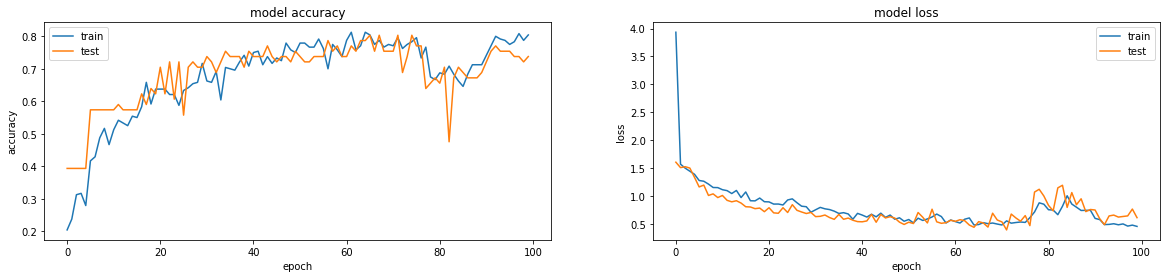

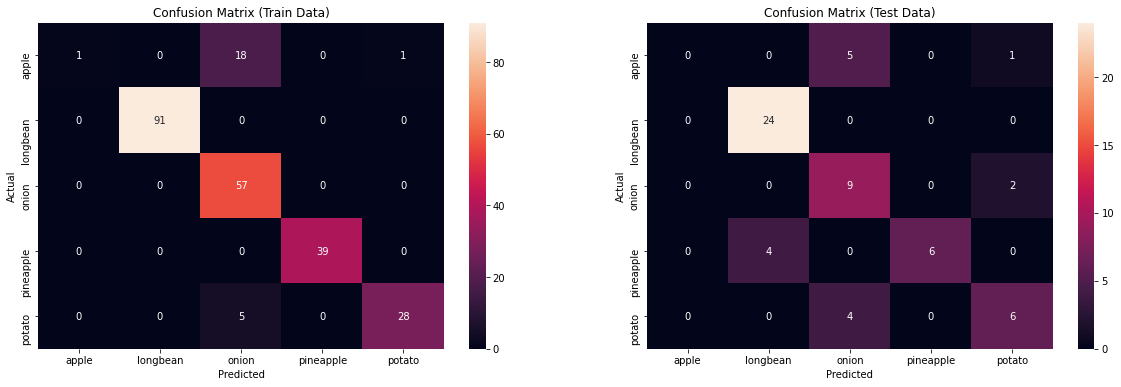

Train Data:
--------------------------------------------------------
              precision    recall  f1-score   support

       apple       1.00      0.05      0.10        20
    longbean       1.00      1.00      1.00        91
       onion       0.71      1.00      0.83        57
   pineapple       1.00      1.00      1.00        39
      potato       0.97      0.85      0.90        33

    accuracy                           0.90       240
   macro avg       0.94      0.78      0.77       240
weighted avg       0.93      0.90      0.87       240


Test Data:
--------------------------------------------------------
              precision    recall  f1-score   support

       apple       0.00      0.00      0.00         6
    longbean       0.86      1.00      0.92        24
       onion       0.50      0.82      0.62        11
   pineapple       1.00      0.60      0.75        10
      potato       0.67      0.60      0.63        10

    accuracy                           0.74    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
## Training Loss and Accuracy
display_training_loss_and_accuracy(history)

## Classification and Confusion Matrix
display_classification_confusion_matrix(model, X_train, y_train, X_test, y_test, label, mask=None)

## Load and Predict Test Images

onion (0.474)
apple (0.261)
potato (0.152)


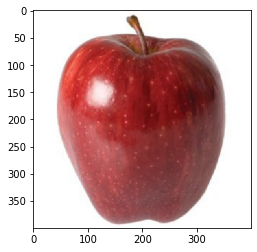

In [25]:
img = image.load_img(PM_image + 'apple_001.jpg', target_size=input_shape)
img = image.img_to_array(img)
img = img / 255

classes = np.array(dataset_label.columns[2:])
proba = model.predict(img.reshape(1,400, 400, 3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]]) + " ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

longbean (1.0)
pineapple (0.000228)
onion (7e-13)


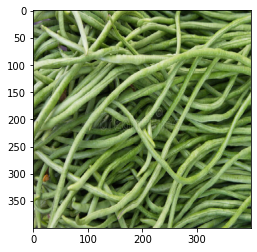

In [26]:
img = image.load_img(PM_image + 'test_longbean_002.jpg', target_size=input_shape)
img = image.img_to_array(img)
img = img / 255

classes = np.array(dataset_label.columns[2:])
proba = model.predict(img.reshape(1,400, 400, 3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]]) + " ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

onion (0.865)
potato (0.131)
apple (0.00421)


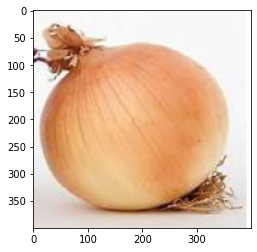

In [27]:
img = image.load_img(PM_image + 'test_onion_001.jpg', target_size=input_shape)
img = image.img_to_array(img)
img = img / 255

classes = np.array(dataset_label.columns[2:])
proba = model.predict(img.reshape(1,400, 400, 3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]]) + " ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)